In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('../DATA/Telco-Customer-Churn.csv')
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<AxesSubplot:xlabel='Churn', ylabel='count'>

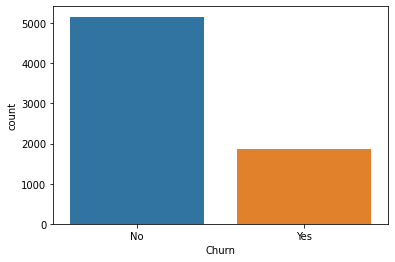

In [4]:
sns.countplot(data=df,x='Churn')

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

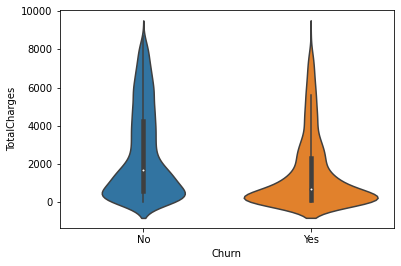

In [7]:
sns.violinplot(data=df,x='Churn',y='TotalCharges')

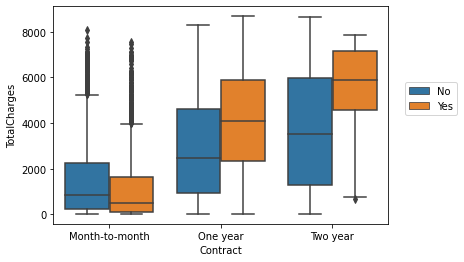

In [8]:
sns.boxplot(data=df,x='Contract',y='TotalCharges',hue='Churn')
plt.legend(loc=(1.05,0.5))

In [13]:
df2 = pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
   'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod','Churn']],drop_first=True)

In [15]:
df2.head()

,SeniorCitizen,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,0,1,0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
2,0,1,0,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,1
3,0,1,0,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1


In [28]:

df2.corr()['Churn_Yes']

SeniorCitizen                            0.150541
gender_Male                             -0.008545
Partner_Yes                             -0.149982
Dependents_Yes                          -0.163128
PhoneService_Yes                         0.011691
MultipleLines_No phone service          -0.011691
MultipleLines_Yes                        0.040033
OnlineSecurity_No internet service      -0.227578
OnlineSecurity_Yes                      -0.171270
OnlineBackup_No internet service        -0.227578
OnlineBackup_Yes                        -0.082307
DeviceProtection_No internet service    -0.227578
DeviceProtection_Yes                    -0.066193
TechSupport_No internet service         -0.227578
TechSupport_Yes                         -0.164716
InternetService_Fiber optic              0.307463
InternetService_No                      -0.227578
StreamingTV_No internet service         -0.227578
StreamingTV_Yes                          0.063254
StreamingMovies_No internet service     -0.227578


<AxesSubplot:xlabel='Churn_Yes'>

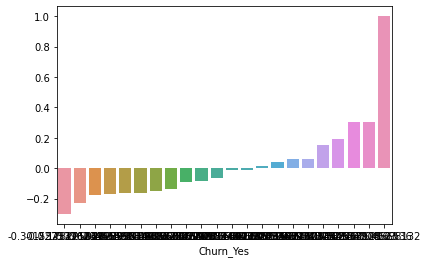

In [26]:
sns.barplot(data=df2.corr()['Churn_Yes'],x=df2.corr()['Churn_Yes'].index,y=df2.corr()['Churn_Yes'].values)

In [22]:
df2.corr()['Churn_Yes'].index

Index(['SeniorCitizen', 'gender_Male', 'Partner_Yes', 'Dependents_Yes',
       'PhoneService_Yes', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No internet service',
       'TechSupport_Yes', 'InternetService_Fiber optic', 'InternetService_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Churn_Yes'],
      dtype='object')

In [24]:
df2.corr()['Churn_Yes'].values

array([ 0.15054105, -0.00854464, -0.14998193, -0.16312844,  0.0116914 ,
       -0.0116914 ,  0.04003274, -0.22757762, -0.17126992, -0.22757762,
       -0.08230697, -0.22757762, -0.06619252, -0.22757762, -0.16471591,
        0.30746259, -0.22757762, -0.22757762,  0.06325398, -0.22757762,
        0.06085994, -0.17822502, -0.30155234,  0.19145432, -0.13468684,
        0.30145464, -0.09077285,  1.        ])

In [29]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

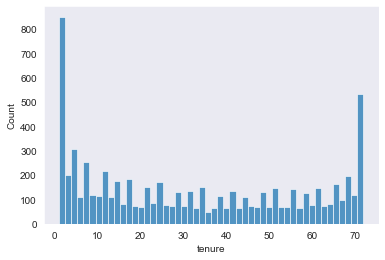

In [37]:
sns.histplot(data=df,x='tenure',bins=50)
sns.set_style("dark")

In [32]:
df['tenure']

0        1
1       34
2        2
3       45
4        2
        ..
7027    24
7028    72
7029    11
7030     4
7031    66
Name: tenure, Length: 7032, dtype: int64

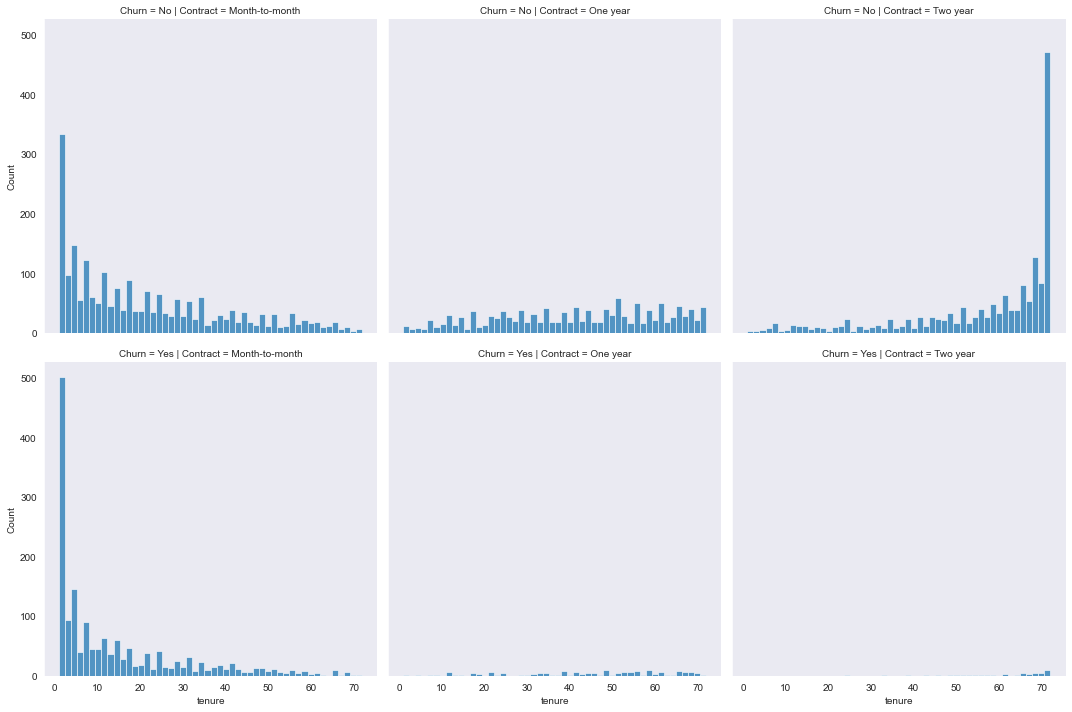

In [39]:
sns.displot(data=df,x='tenure',bins=50,col='Contract',row='Churn')

In [40]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

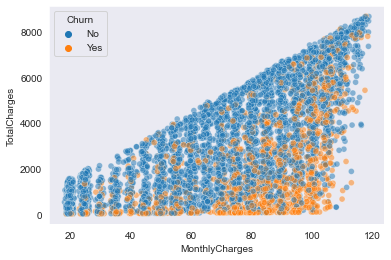

In [43]:
sns.scatterplot(data=df,x='MonthlyCharges',y='TotalCharges',hue='Churn',alpha=0.5)

In [51]:
noChurn = df.groupby(['Churn','tenure']).count().transpose()['No']
yesChurn = df.groupby(['Churn','tenure']).count().transpose()['Yes']

In [52]:
churnR = yesChurn/(noChurn+yesChurn)*100

In [55]:
churnR.transpose()['gender']

tenure
1     61.990212
2     51.680672
3     47.000000
4     47.159091
5     48.120301
        ...    
68     9.000000
69     8.421053
70     9.243697
71     3.529412
72     1.657459
Name: gender, Length: 72, dtype: float64

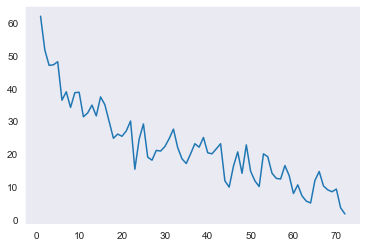

In [56]:
plt.plot(churnR.transpose()['gender'])

In [58]:
df['tenure cohort'] = pd.cut(x=df['tenure'],bins=[0,12,24,48,72],labels=['0-12','12-24','24-48','>48'])

In [59]:
df[['tenure','tenure cohort']]

,tenure,tenure cohort
0,1,0-12
1,34,24-48
2,2,0-12
3,45,24-48
4,2,0-12
...,...,...
7027,24,12-24
7028,72,>48
7029,11,0-12
7030,4,0-12


In [62]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'tenure cohort'],
      dtype='object')

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

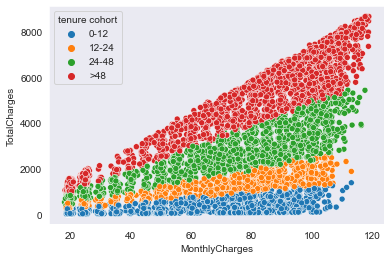

In [63]:
sns.scatterplot(data=df,x='MonthlyCharges',y='TotalCharges',hue='tenure cohort')

<AxesSubplot:xlabel='tenure cohort', ylabel='count'>

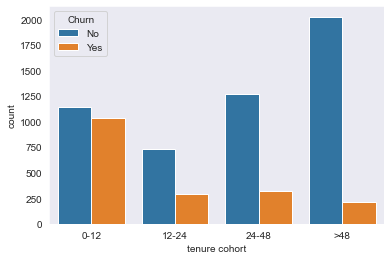

In [64]:
sns.countplot(data=df,x='tenure cohort',hue='Churn')

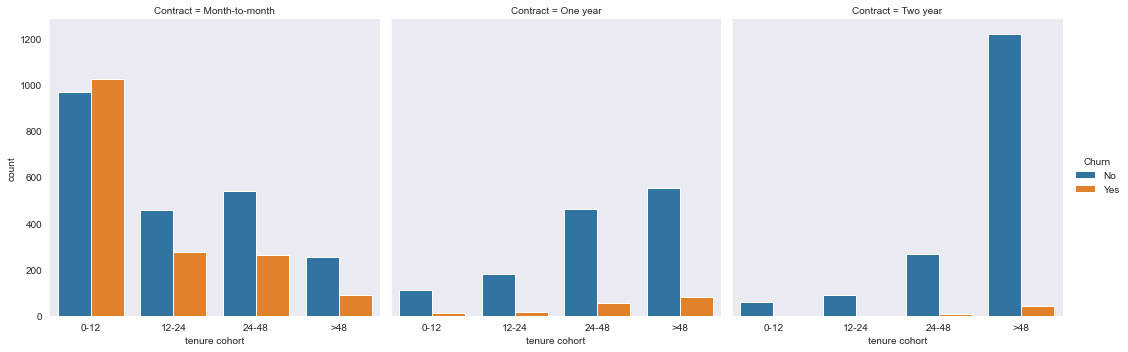

In [68]:
sns.catplot(data=df,x='tenure cohort',hue='Churn',col='Contract',kind='count')

In [70]:
df2.columns

Index(['SeniorCitizen', 'gender_Male', 'Partner_Yes', 'Dependents_Yes',
       'PhoneService_Yes', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No internet service',
       'TechSupport_Yes', 'InternetService_Fiber optic', 'InternetService_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Churn_Yes'],
      dtype='object')

In [71]:
X = df2.drop('Churn_Yes',axis=1)
Y = df2['Churn_Yes']

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y,test_size=0.1,random_state=101)

In [74]:
from sklearn.tree import DecisionTreeClassifier

In [75]:
from sklearn.model_selection import GridSearchCV

In [76]:
model = DecisionTreeClassifier()
params = {'max_depth':[2,4,6,8,10]}

In [77]:
grid = GridSearchCV(model,params)

In [78]:
grid.fit(Xtrain,Ytrain)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 4, 6, 8, 10]})

In [80]:
preds = grid.predict(Xtest)

In [81]:
from sklearn.metrics import classification_report,plot_confusion_matrix,accuracy_score

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


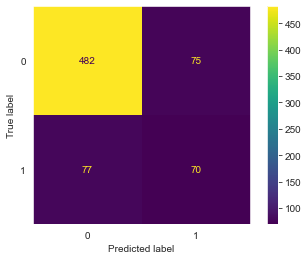

In [82]:
plot_confusion_matrix(grid,Xtest,Ytest)

In [83]:
grid.best_params_

{'max_depth': 6}

In [84]:
print(classification_report(Ytest,preds))

              precision    recall  f1-score   support

           0       0.86      0.87      0.86       557
           1       0.48      0.48      0.48       147

    accuracy                           0.78       704
   macro avg       0.67      0.67      0.67       704
weighted avg       0.78      0.78      0.78       704



In [85]:
grid.best_estimator_.feature_importances_

array([6.35731834e-04, 2.63499939e-03, 7.90533815e-03, 6.19856869e-03,
       1.33221018e-03, 4.12664215e-03, 7.20807258e-04, 8.74671605e-03,
       3.85753800e-02, 0.00000000e+00, 1.65208509e-02, 5.77206066e-03,
       1.39551454e-03, 0.00000000e+00, 1.67736649e-02, 3.44081401e-01,
       0.00000000e+00, 0.00000000e+00, 7.11879837e-03, 2.88676136e-04,
       1.01771096e-02, 2.24970147e-01, 2.44606180e-01, 5.71097164e-03,
       2.77908853e-03, 4.89291430e-02, 0.00000000e+00])

In [88]:
imp = pd.DataFrame(index=X.columns,data=grid.best_estimator_.feature_importances_,columns=['imp'])

In [87]:
imp

,0
SeniorCitizen,0.000636
gender_Male,0.002635
Partner_Yes,0.007905
Dependents_Yes,0.006199
PhoneService_Yes,0.001332
MultipleLines_No phone service,0.004127
MultipleLines_Yes,0.000721
OnlineSecurity_No internet service,0.008747
OnlineSecurity_Yes,0.038575
OnlineBackup_No internet service,0.000000


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 [Text(0, 0, 'TechSupport_No internet service'),
  Text(1, 0, 'StreamingTV_No internet service'),
  Text(2, 0, 'InternetService_No'),
  Text(3, 0, 'OnlineBackup_No internet service'),
  Text(4, 0, 'PaymentMethod_Mailed check'),
  Text(5, 0, 'StreamingMovies_No internet service'),
  Text(6, 0, 'SeniorCitizen'),
  Text(7, 0, 'MultipleLines_Yes'),
  Text(8, 0, 'PhoneService_Yes'),
  Text(9, 0, 'DeviceProtection_Yes'),
  Text(10, 0, 'gender_Male'),
  Text(11, 0, 'PaymentMethod_Credit card (automatic)'),
  Text(12, 0, 'MultipleLines_No phone service'),
  Text(13, 0, 'PaperlessBilling_Yes'),
  Text(14, 0, 'DeviceProtection_No internet service'),
  Text(15, 0, 'Dependents_Yes'),
  Text(16, 0, 'StreamingTV_Yes'),
  Text(17, 0, 'Partner_Yes'),
  Text(18, 0, 'OnlineSecurity_No internet service'),
  Text(19, 0, 'StreamingMovies_Yes'),
  Text(20, 0, 'OnlineBackup_Yes'),
  T

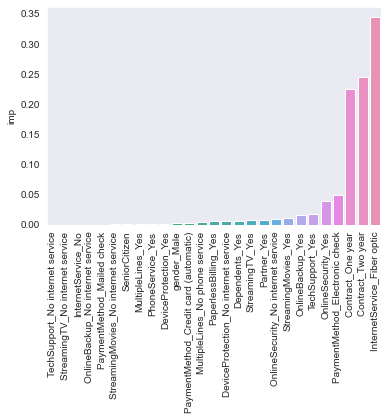

In [96]:
sns.barplot(data=imp.sort_values('imp'),x=imp.sort_values('imp').index,y='imp')
plt.xticks(rotation=90)

In [97]:
from sklearn.ensemble import RandomForestClassifier

In [120]:
model = RandomForestClassifier()
params = {'n_estimators':[10,64,100,128,200],'max_depth':[2,4,6],'bootstrap':[True,False]}

In [121]:
grid = GridSearchCV(model,params)

In [122]:
grid.fit(Xtrain,Ytrain)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4, 6],
                         'n_estimators': [10, 64, 100, 128, 200]})

In [123]:
grid.best_params_

{'bootstrap': True, 'max_depth': 6, 'n_estimators': 100}

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


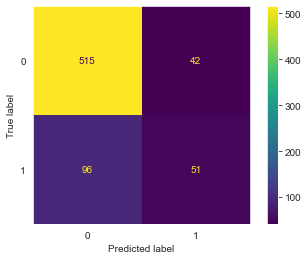

In [124]:
plot_confusion_matrix(grid,Xtest,Ytest)

In [125]:
preds= grid.predict(Xtest)

In [126]:
print(classification_report(preds,Ytest))

              precision    recall  f1-score   support

           0       0.92      0.84      0.88       611
           1       0.35      0.55      0.42        93

    accuracy                           0.80       704
   macro avg       0.64      0.70      0.65       704
weighted avg       0.85      0.80      0.82       704



In [105]:
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier

In [113]:
ada = AdaBoostClassifier()
pg = {'n_estimators':[50,100,150,200]}
grid = GridSearchCV(ada,pg)

In [114]:
grid.fit(Xtrain,Ytrain)

GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'n_estimators': [50, 100, 150, 200]})

In [115]:
grid.best_params_

{'n_estimators': 100}

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


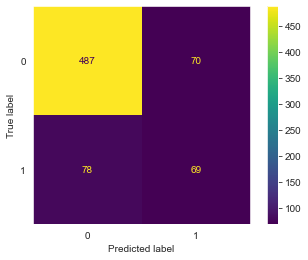

In [116]:
plot_confusion_matrix(grid,Xtest,Ytest)

In [119]:
print(classification_report(Ytest,preds))

              precision    recall  f1-score   support

           0       0.86      0.87      0.87       557
           1       0.50      0.47      0.48       147

    accuracy                           0.79       704
   macro avg       0.68      0.67      0.68       704
weighted avg       0.79      0.79      0.79       704



In [117]:
preds = grid.predict(Xtest)